<a href="https://colab.research.google.com/github/rahulrajpr/AdvancedFeatureEngineering/blob/Scalling/MaxAbsScalling.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Max Abs Scalling = x / x_max

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [ ]:
from sklearn.datasets import load_boston

In [ ]:
boston = load_boston()

In [ ]:
data = pd.DataFrame(data = boston.data, columns = boston.feature_names)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 13 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
dtypes: float64(13)
memory usage: 51.5 KB


In [ ]:
boston.target

array([24. , 21.6, 34.7, 33.4, 36.2, 28.7, 22.9, 27.1, 16.5, 18.9, 15. ,
       18.9, 21.7, 20.4, 18.2, 19.9, 23.1, 17.5, 20.2, 18.2, 13.6, 19.6,
       15.2, 14.5, 15.6, 13.9, 16.6, 14.8, 18.4, 21. , 12.7, 14.5, 13.2,
       13.1, 13.5, 18.9, 20. , 21. , 24.7, 30.8, 34.9, 26.6, 25.3, 24.7,
       21.2, 19.3, 20. , 16.6, 14.4, 19.4, 19.7, 20.5, 25. , 23.4, 18.9,
       35.4, 24.7, 31.6, 23.3, 19.6, 18.7, 16. , 22.2, 25. , 33. , 23.5,
       19.4, 22. , 17.4, 20.9, 24.2, 21.7, 22.8, 23.4, 24.1, 21.4, 20. ,
       20.8, 21.2, 20.3, 28. , 23.9, 24.8, 22.9, 23.9, 26.6, 22.5, 22.2,
       23.6, 28.7, 22.6, 22. , 22.9, 25. , 20.6, 28.4, 21.4, 38.7, 43.8,
       33.2, 27.5, 26.5, 18.6, 19.3, 20.1, 19.5, 19.5, 20.4, 19.8, 19.4,
       21.7, 22.8, 18.8, 18.7, 18.5, 18.3, 21.2, 19.2, 20.4, 19.3, 22. ,
       20.3, 20.5, 17.3, 18.8, 21.4, 15.7, 16.2, 18. , 14.3, 19.2, 19.6,
       23. , 18.4, 15.6, 18.1, 17.4, 17.1, 13.3, 17.8, 14. , 14.4, 13.4,
       15.6, 11.8, 13.8, 15.6, 14.6, 17.8, 15.4, 21

In [ ]:
target = pd.Series(boston.target).rename('MEDV')

In [ ]:
data.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000


In [ ]:
data.describe().loc['mean']

CRIM         3.613524
ZN          11.363636
INDUS       11.136779
CHAS         0.069170
NOX          0.554695
RM           6.284634
AGE         68.574901
DIS          3.795043
RAD          9.549407
TAX        408.237154
PTRATIO     18.455534
B          356.674032
LSTAT       12.653063
Name: mean, dtype: float64

In [ ]:
data.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
dtype: int64

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train,X_test, y_train, y_test = train_test_split(data,target, train_size = 0.7, random_state = 100)

In [ ]:
from sklearn.preprocessing import MaxAbsScaler

In [ ]:
scaler = MaxAbsScaler()

In [ ]:
scaler.fit(X_train)

MaxAbsScaler()

In [ ]:
scaler.max_abs_

array([ 73.5341, 100.    ,  27.74  ,   1.    ,   0.871 ,   8.78  ,
       100.    ,  10.7103,  24.    , 711.    ,  22.    , 396.9   ,
        37.97  ])

In [ ]:
scaler.scale_

array([ 73.5341, 100.    ,  27.74  ,   1.    ,   0.871 ,   8.78  ,
       100.    ,  10.7103,  24.    , 711.    ,  22.    , 396.9   ,
        37.97  ])

In [ ]:
scaler.transform(X_train)

array([[7.91625926e-02, 0.00000000e+00, 6.52487383e-01, ...,
        9.18181818e-01, 9.92239859e-01, 2.71003424e-01],
       [1.29354952e-03, 0.00000000e+00, 4.62509012e-01, ...,
        8.50000000e-01, 9.65558075e-01, 2.35449039e-01],
       [1.39159927e-01, 0.00000000e+00, 6.52487383e-01, ...,
        9.18181818e-01, 9.56664147e-01, 4.74848565e-01],
       ...,
       [3.86106582e-03, 0.00000000e+00, 2.66041817e-01, ...,
        8.90909091e-01, 9.85462333e-01, 3.09191467e-01],
       [4.86576976e-04, 2.00000000e-01, 1.20043259e-01, ...,
        6.77272727e-01, 9.75837743e-01, 9.90255465e-02],
       [2.87268084e-03, 1.25000000e-01, 2.83705840e-01, ...,
        6.90909091e-01, 9.74124465e-01, 7.88253885e-01]])

In [ ]:
X_train_scaled = pd.DataFrame(data = scaler.transform(X_train), columns = X_train.columns)
X_test_scaled = pd.DataFrame(data = scaler.transform(X_test), columns = X_test.columns)

In [ ]:
X_train_scaled.describe().round(2)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
count,354.00,354.00,354.00,354.00,354.00,354.00,354.00,354.00,354.00,354.00,354.00,354.00,354.00
mean,0.05,0.12,0.39,0.07,0.63,0.72,0.68,0.36,0.40,0.57,0.84,0.90,0.33
std,0.11,0.23,0.24,0.26,0.13,0.08,0.28,0.19,0.36,0.24,0.10,0.23,0.19
min,0.00,0.00,0.04,0.00,0.44,0.41,0.06,0.11,0.04,0.26,0.57,0.00,0.05
25%,0.00,0.00,0.18,0.00,0.51,0.67,0.45,0.20,0.17,0.39,0.79,0.95,0.18
50%,0.00,0.00,0.33,0.00,0.60,0.71,0.76,0.31,0.21,0.46,0.86,0.99,0.28
75%,0.05,0.20,0.65,0.00,0.72,0.76,0.94,0.49,1.00,0.94,0.92,1.00,0.44
max,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00


In [ ]:
X_train_scaled.describe().loc[['mean','std','min','max']].round(2)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
mean,0.05,0.12,0.39,0.07,0.63,0.72,0.68,0.36,0.40,0.57,0.84,0.90,0.33
std,0.11,0.23,0.24,0.26,0.13,0.08,0.28,0.19,0.36,0.24,0.10,0.23,0.19
min,0.00,0.00,0.04,0.00,0.44,0.41,0.06,0.11,0.04,0.26,0.57,0.00,0.05
max,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00


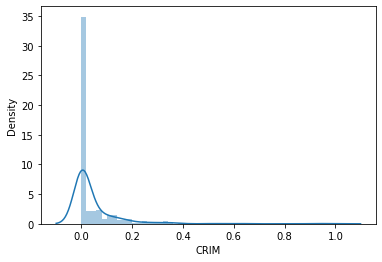

In [ ]:
sns.distplot(X_train_scaled['CRIM'])
plt.show()

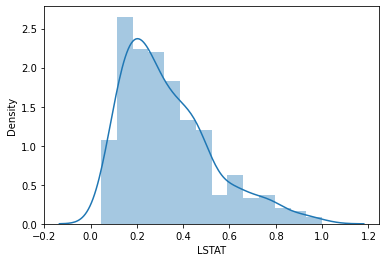

In [ ]:
sns.distplot(X_train_scaled['LSTAT'])
plt.show()